In [1]:
import sys
sys.path.append('../src')

import pandas as pd

from utils.utils import remove_footnotes, remove_punctuation, remove_stopwords_vietnamese

from underthesea import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/all_wiki_data.csv')
df['label'] = df['label'].replace({
    0: "Natural Sciences",
    1: "Social Sciences",
    2: "Engineering",
    3: "Culture",
    4: "Other"
})
df.head()

,title,content,label
0,Melocalamus scandens,Melocalamus scandens là một loài thực vật có h...,Natural Sciences
1,Paleauletobius silenus,Paleauletobius silenus là một loài bọ cánh cứn...,Natural Sciences
2,Zoodes hirsutus,Zoodes hirsutus là một loài bọ cánh cứng trong...,Natural Sciences
3,Quốc kỳ Argentina,Quốc kỳ Argentina ( tiếng Tây Ban Nha : Bander...,Culture
4,Dundahera,Dundahera là một thị trấn thống kê ( census to...,Social Sciences


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2224 non-null   object
 1   content  2224 non-null   object
 2   label    2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


In [5]:
def tokenize(text):
    list_word = word_tokenize(text)
    return list_word

In [6]:
df['tokenized_words'] = df['content'].apply(tokenize)

In [4]:
df['content'] = df['content'].apply(remove_footnotes)
df['content'] = df['content'].apply(remove_punctuation)
df['content'] = df['content'].apply(remove_stopwords_vietnamese)

In [7]:
df.head(10)

,title,content,label,tokenized_words
0,Melocalamus scandens,Melocalamus scandens loài thực vật hoa Hòa thả...,Natural Sciences,"[Melocalamus, scandens, loài, thực vật, hoa, H..."
1,Paleauletobius silenus,Paleauletobius silenus loài bọ cánh cứng Rhync...,Natural Sciences,"[Paleauletobius, silenus, loài, bọ cánh, cứng,..."
2,Zoodes hirsutus,Zoodes hirsutus loài bọ cánh cứng Cerambycidae,Natural Sciences,"[Zoodes, hirsutus, loài, bọ cánh, cứng, Ceramb..."
3,Quốc kỳ Argentina,Quốc kỳ Argentina tiếng Tây Ban Nha Bandera de...,Culture,"[Quốc kỳ, Argentina tiếng, Tây Ban Nha, Bander..."
4,Dundahera,Dundahera thị trấn thống kê census town Gurgao...,Social Sciences,"[Dundahera, thị trấn, thống kê, census, town, ..."
5,Nạn khan hiếm nhu yếu phẩm tại Venezuela,Nạn khan hiếm nhu yếu phẩm Venezuela tiếng Tây...,Social Sciences,"[Nạn, khan hiếm, nhu yếu phẩm, Venezuela tiếng..."
6,Siphocampylus imbricatus,Siphocampylus imbricatus loài thực vật hoa Hoa...,Natural Sciences,"[Siphocampylus, imbricatus, loài, thực vật, ho..."
7,Archidendron royenii,Archidendron royenii loài thực vật hoa Đậu Loà...,Natural Sciences,"[Archidendron, royenii, loài, thực vật, hoa, Đ..."
8,Agylla vittata,Agylla vittata loài bướm đêm phân họ Arctiinae...,Natural Sciences,"[Agylla, vittata, loài, bướm, đêm, phân, họ, A..."
9,"Laurens, Hérault",Laurens xã tỉnh Hérault Occitanie nam Pháp Xã ...,Social Sciences,"[Laurens, xã, tỉnh, Hérault Occitanie, nam, Ph..."


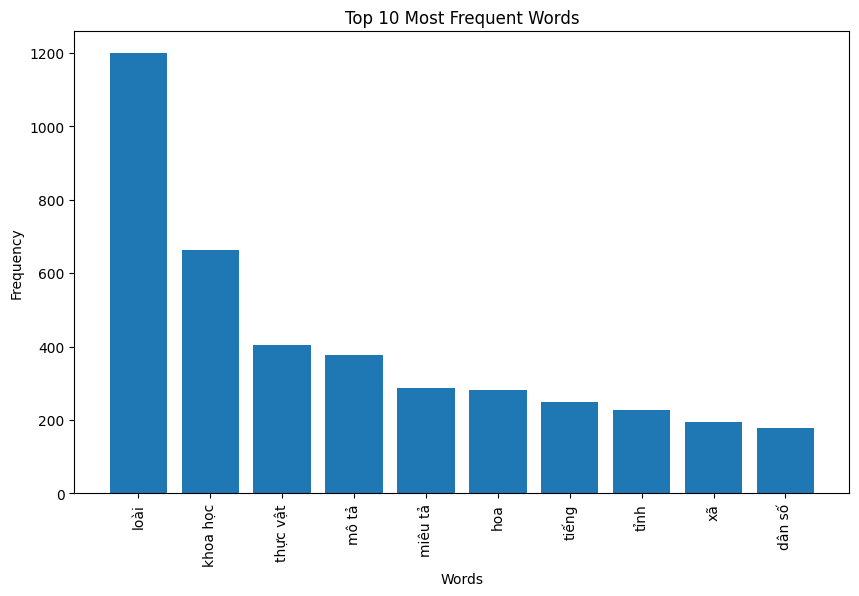

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing tokenized words
tokenized_words = df['tokenized_words'].explode().dropna()

# Tính toán tần suất của từng từ
word_counts = Counter(tokenized_words)

# Lấy danh sách các từ và tần suất tương ứng
words = list(word_counts.keys())
counts = list(word_counts.values())

# Sắp xếp theo tần suất giảm dần và chỉ lấy top 10
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:10]
top_words = [words[i] for i in sorted_indices]
top_counts = [counts[i] for i in sorted_indices]

# Vẽ biểu đồ tần suất cho top 10 từ
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=90)

plt.savefig(f'../img/image_1.png', bbox_inches='tight')
plt.show()



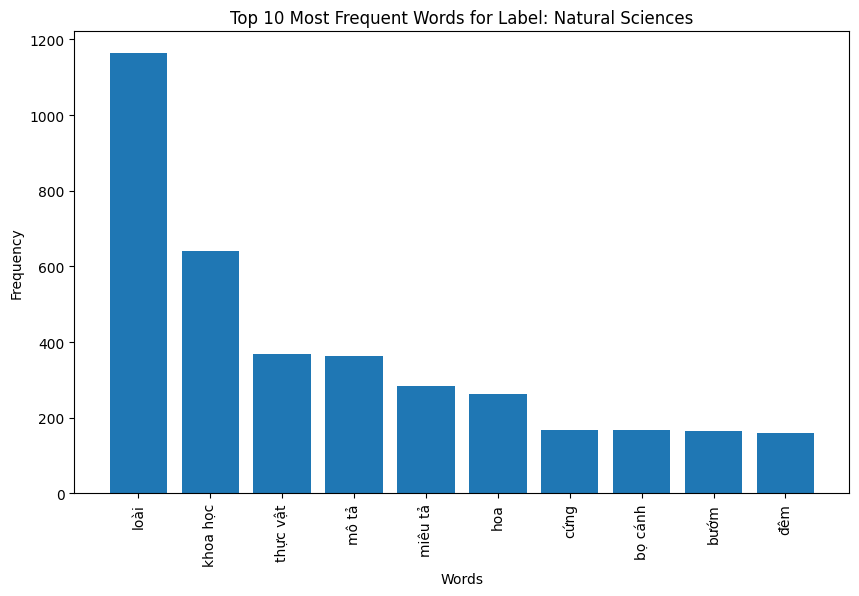

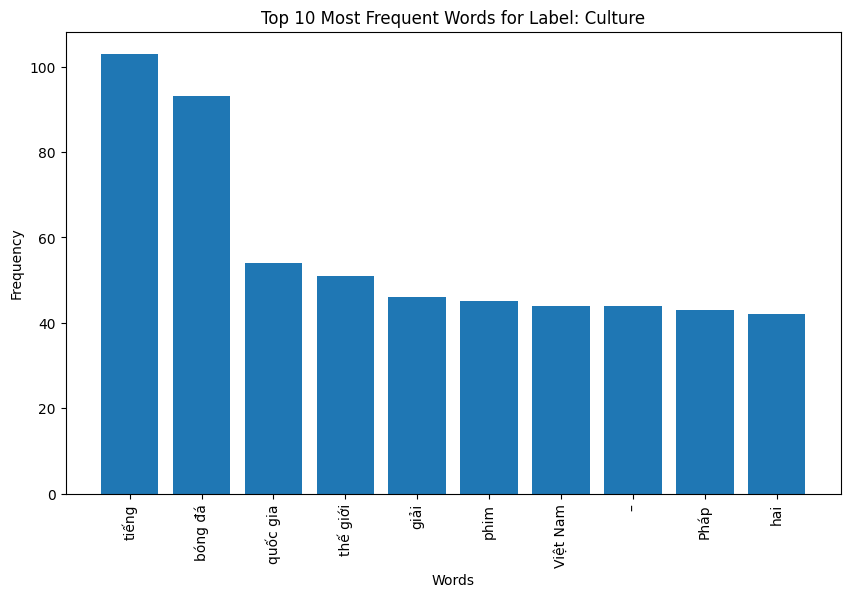

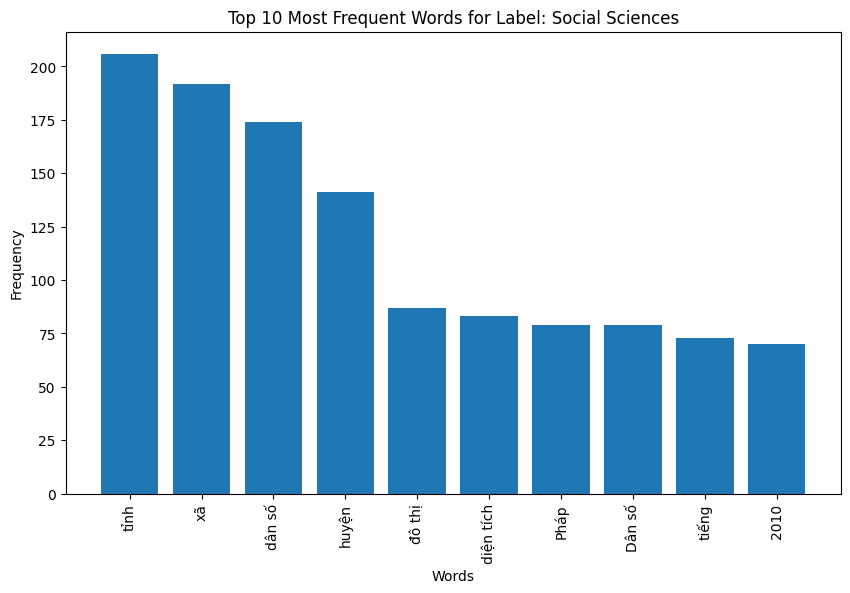

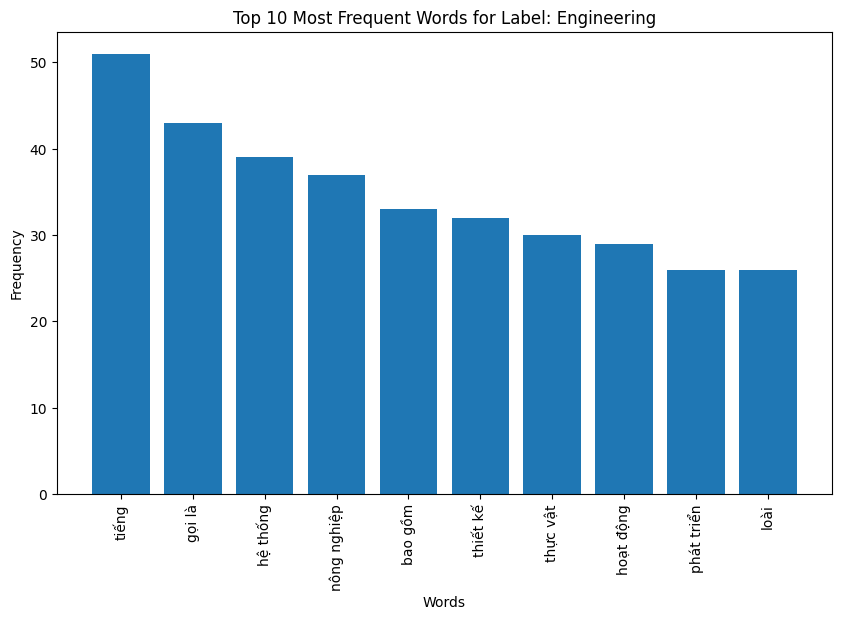

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing tokenized words and labels
tokenized_words = df['tokenized_words'].explode().dropna()
labels = df['label']

# Tạo một bộ đếm từng nhãn
label_word_counts = {}

# Tính toán tần suất của từng từ cho mỗi nhãn
for label in labels.unique():
    label_words = tokenized_words[labels == label]
    word_counts = Counter(label_words)
    label_word_counts[label] = word_counts

# Vẽ biểu đồ cho mỗi nhãn và lưu vào các tệp hình ảnh khác nhau
for i, (label, word_counts) in enumerate(label_word_counts.items(), start=2):
    # Lấy danh sách các từ và tần suất tương ứng
    words = list(word_counts.keys())
    counts = list(word_counts.values())

    # Sắp xếp theo tần suất giảm dần và chỉ lấy top 10
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:10]
    top_words = [words[i] for i in sorted_indices]
    top_counts = [counts[i] for i in sorted_indices]

    # Vẽ biểu đồ tần suất cho top 10 từ của mỗi nhãn
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Words for Label: {label}')
    plt.xticks(rotation=90)
    plt.savefig(f'../img/image_{i}.png', bbox_inches='tight')
    plt.show()


## Label frequency

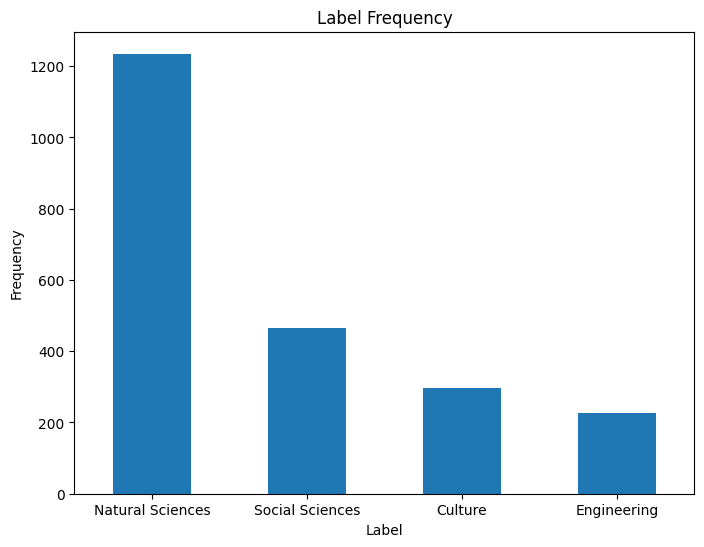

In [13]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Frequency')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 

plt.savefig('../img/image_6.png', bbox_inches='tight')
plt.show()

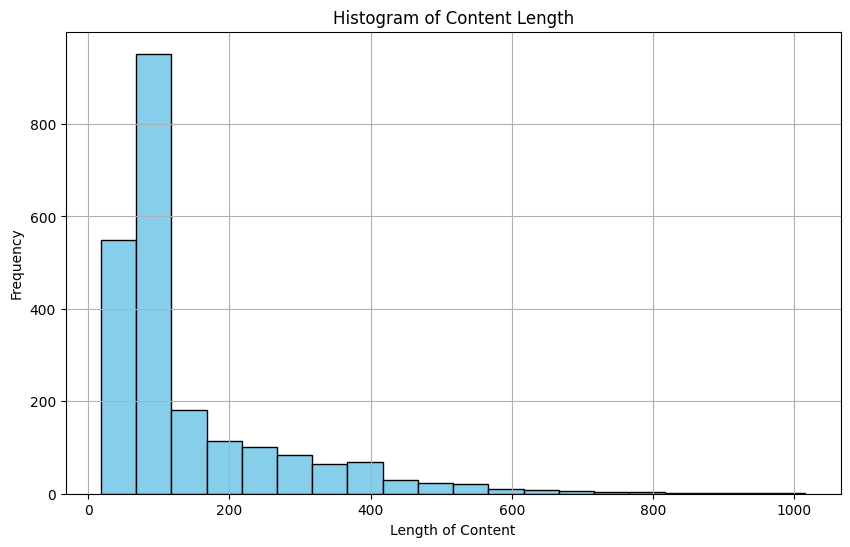

In [20]:
# Tạo histogram
plt.figure(figsize=(10, 6))
plt.hist(df['content'].apply(len), bins=20, color='skyblue', edgecolor='black')  # Độ dài của nội dung
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.title('Histogram of Content Length')
plt.grid(True)

plt.savefig('../img/image_7.png', bbox_inches='tight')
plt.show()

In [21]:
df['content_length'] = df['content'].apply(len)

In [22]:
# Lấy ra top 10 content ngắn nhất
top_10_shortest_content = df.nsmallest(10, 'content_length')

# In ra top 10 content ngắn nhất cùng với độ dài của chúng
print(top_10_shortest_content[['content', 'content_length']])



                              content  content_length
56                 275 TCN lịch La Mã              18
2211          Champions League chủ đề              23
193     Pitharatus chi nhện Araneidae              29
335     Oxysoma chi nhện Anyphaenidae              29
906     Peltolepis chi rêu Cleveaceae              29
1017    Physula chi bướm đêm Erebidae              29
105    Peplometus chi nhện Salticidae              30
1222   Torcy xã tỉnh PasdeCalais Pháp              30
333   Elesotis chi bướm đêm Noctuidae              31
836   Tateanthus chi thực vật hoa Mua              31


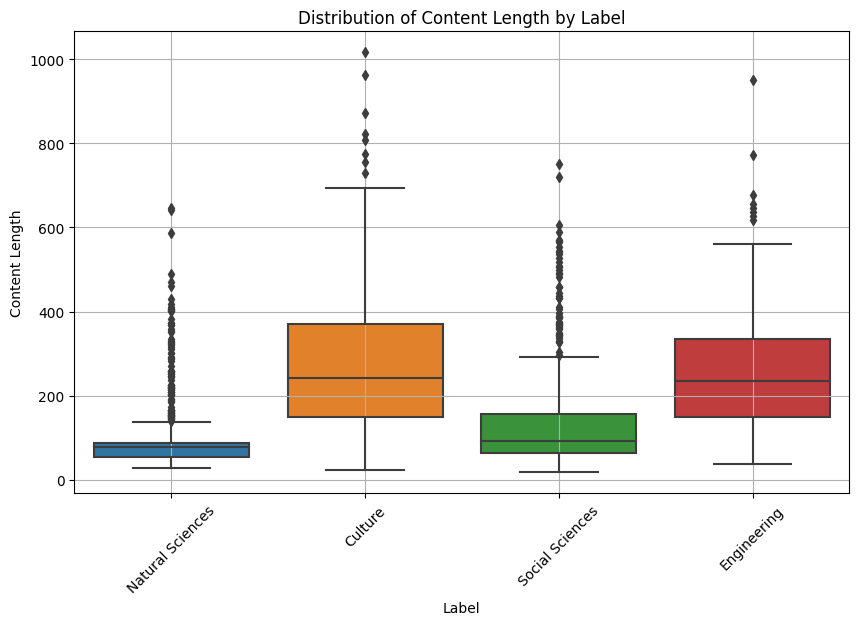

In [23]:

# Tạo box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='content_length')
plt.xlabel('Label')
plt.ylabel('Content Length')
plt.title('Distribution of Content Length by Label')
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig('../img/image_8.png', bbox_inches='tight')
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_26528\3121171853.py:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)  # Lấy kích thước của văn bản


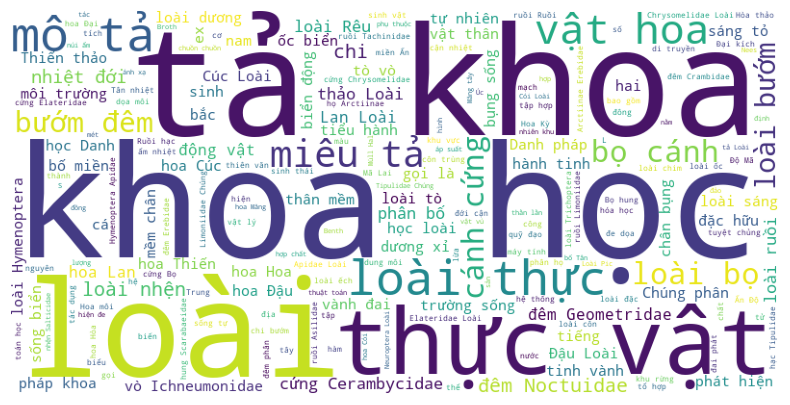

C:\Users\Admin\AppData\Local\Temp\ipykernel_26528\3121171853.py:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)  # Lấy kích thước của văn bản


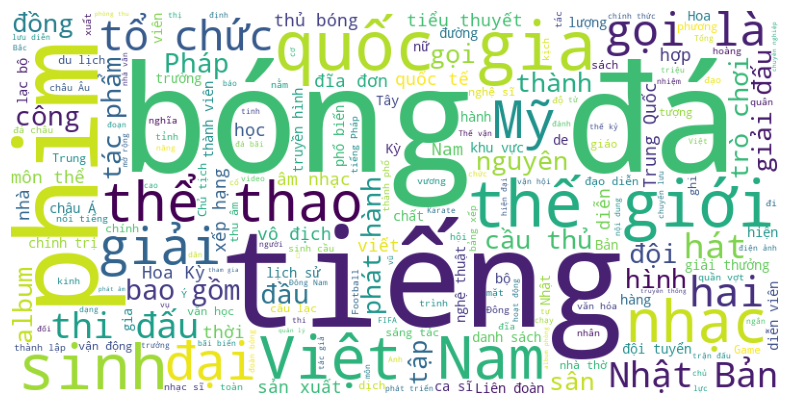

C:\Users\Admin\AppData\Local\Temp\ipykernel_26528\3121171853.py:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)  # Lấy kích thước của văn bản


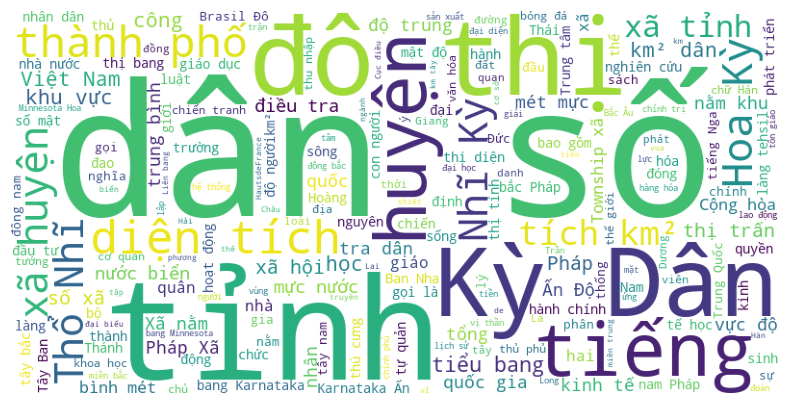

C:\Users\Admin\AppData\Local\Temp\ipykernel_26528\3121171853.py:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)  # Lấy kích thước của văn bản


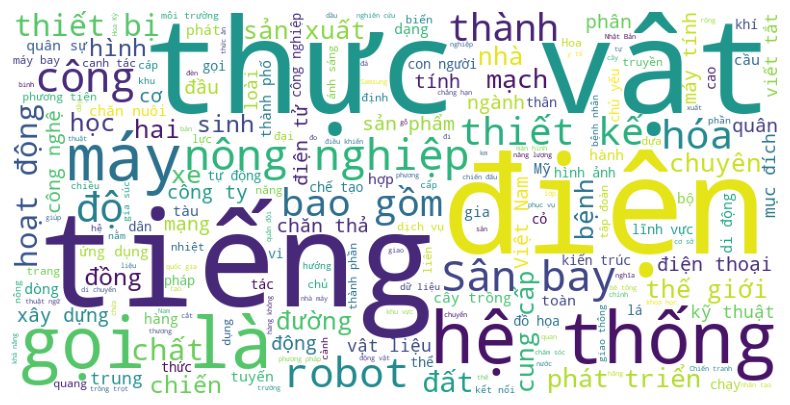

In [28]:
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

def generate_wordcloud_with_label(text, label):
    # Tạo đối tượng WordCloud với chiều cao 400 pixel
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Chuyển WordCloud thành mảng numpy
    wordcloud_array = wordcloud.to_array()

    # Tạo hình ảnh từ mảng numpy
    img = Image.fromarray(wordcloud_array)

    # Tạo một đối tượng vẽ
    draw = ImageDraw.Draw(img)

    # Thêm nhãn vào ảnh
    font = ImageFont.truetype("arial.ttf", 30)  # Lựa chọn font và kích cỡ chữ
    text_width, text_height = draw.textsize(label, font=font)  # Lấy kích thước của văn bản
    draw.text(((img.width - text_width) // 2, img.height + 10), label, fill="black", font=font)  # Vẽ văn bản ở giữa trên cùng

    # Hiển thị ảnh với vị trí từ 0 đến 400
    plt.figure(figsize=(10, 5))
    plt.imshow(img, extent=[0, 800, 0, 400])
    plt.axis('off')
    plt.show()

# Tạo WordCloud cho từng nhóm và thêm tên nhãn
for label in df['label'].unique():
    label_str = str(label)  # Chuyển đổi label sang chuỗi trước khi sử dụng
    text = ' '.join(df[df['label'] == label]['content'])
    generate_wordcloud_with_label(text, label_str)
